### Epsilon-Greedy Implementation
It exploits the best available option with 1-e probability and explores sub-optimal options with e probability. If we increase e then the algorithm explores the options more frequently. 'e' acts as a hyperparameter for tuning MAB algorithm.

In [1]:
#Import Required libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [14]:
np.random.random()

0.7952717779880062

In [11]:
class EpsilonGreedy:
    def __init__(self,epsilon,counts=None,values=None):
        self.epsilon = epsilon
        self.counts = counts
        self.values = values
        
    def initialize(self,n_arms):
        self.counts = np.zeros(n_arms,dtype=int)
        self.values = np.zeros(n_arms,dtype=float)
        
    def select_arm(self):
        z=np.random.random()
        if z > self.epsilon:
            return(np.argmax(self.values))
        return(np.random.randint(0,len(self.values)))
    
    def update(self,chosen_arm,reward):
        self.counts[chosen_arm]+=1
        n=self.counts[chosen_arm]
        
        value=self.values[chosen_arm]
        new_value=value*((n-1)/n)+reward/n
        self.values[chosen_arm]=new_value
        
        return (self.counts,self.values)

In [6]:
def plot_algorithm(algo_name,arms,best_arm_index,hyper_params,num_simulations,horizon,label):
    fig, axes = plt.subplots(1, 3, figsize=(18,6))
    for hyper_param in hyper_params:
        
        # Run the algorithm
        algo = EpsilonGreedy(hyper_param)
        chosen_arms, average_rewards, cum_rewards = test_algorithm(algo, arms, num_simulations, horizon)
        average_probs = np.where(chosen_arms == best_arm_index, 1, 0).sum(axis=0) / num_simulations
        
        #print("Number of times the best arm was chosen",(np.where(chosen_arms == best_arm_index, 1, 0).sum(axis=0)))
        
        # Plot results
        axes[0].plot(average_probs, label=f"{label} = {hyper_param}")
        axes[0].set_xlabel("Time", fontsize=14)
        axes[0].set_ylabel("Probability of Selecting Best Arm", fontsize=14)
        axes[0].set_title(f"Accuracy of {algo_name}", y=1.05, fontsize=16)
        axes[0].legend()
        axes[0].set_ylim([0, 1.05])
        axes[1].plot(average_rewards, label=f"{label} = {hyper_param}")
        axes[1].set_xlabel("Time", fontsize=14)
        axes[1].set_ylabel("Average Reward", fontsize=14)
        axes[1].set_title(f"Avg. Rewards of {algo_name}", y=1.05, fontsize=16)
        axes[1].legend()
        axes[1].set_ylim([0, 1.0])
        axes[2].plot(cum_rewards, label=f"{label} = {hyper_param}")
        axes[2].set_xlabel("Time", fontsize=14)
        axes[2].set_ylabel("Cumulative Rewards of Chosen Arm", fontsize=14)
        axes[2].set_title(f"Cumulative Rewards of {algo_name}", y=1.05, fontsize=16)
        axes[2].legend(loc="lower right")
        plt.tight_layout()

Number of times an arm was chosen [114   6 341  30   9]
Rewards for each arm: [0.10526316 0.         0.90029326 0.03333333 0.11111111]
Number of times an arm was chosen [ 39  19 382  22  38]
Rewards for each arm: [0.05128205 0.15789474 0.89790576 0.09090909 0.05263158]
Number of times an arm was chosen [ 52  32 356  35  25]
Rewards for each arm: [0.13461538 0.03125    0.88483146 0.14285714 0.12      ]
Number of times an arm was chosen [ 43  37 340  50  30]
Rewards for each arm: [0.06976744 0.08108108 0.86764706 0.04       0.1       ]


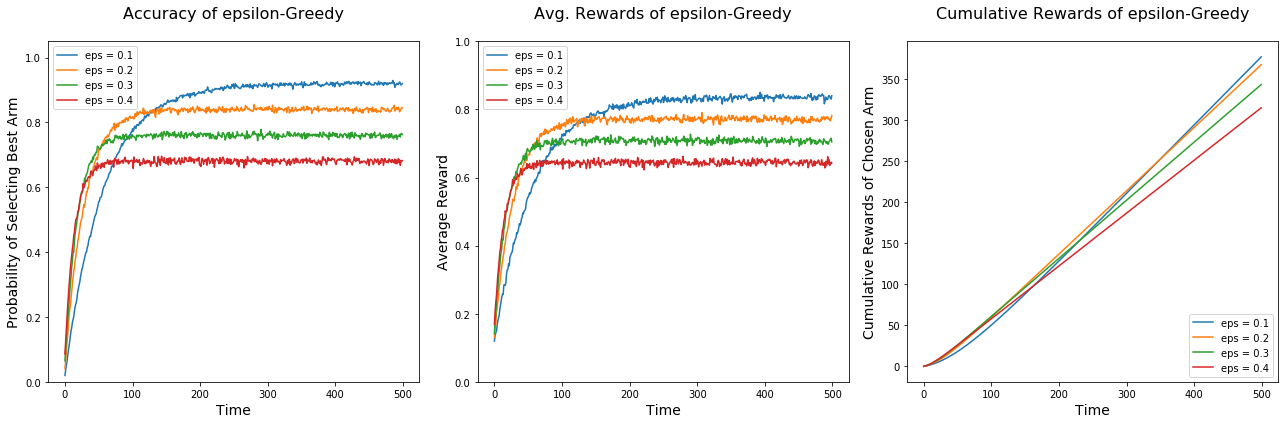

In [8]:
np.random.seed(1)
means=[0.1,0.1,0.1,0.1,0.9]
n_arms=len(means)
np.random.shuffle(means)
arms=list(map(lambda mu: BernoulliArm(mu),means))

best_arm_index=np.argmax(means)
epsilon=[0.1,0.2,0.3,0.4]

plot_algorithm(algo_name='epsilon-Greedy',arms=arms,best_arm_index=best_arm_index,hyper_params=epsilon,
               num_simulations=5000,horizon=500,label="eps")

### References
https://imaddabbura.github.io/post/epsilon_greedy_algorithm/